# Project: Investigate a Dataset (Patient no show  appointments may 2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [38]:
import  numpy as np
import pandas as pd 
import matplotlib.pyplot as mplt 
import plotly as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.



In [39]:
df = pd.read_csv(r"D:\ML\FWD Projects\Investigate a Dataset Udacity  FWD Second Project\noshowappointments-kagglev2-may-2016.csv")

In [40]:
df.shape

(110527, 14)

In [41]:
df. head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Dictionary
``` text
01 - PatientId
Identification of a patient
02 - AppointmentID
Identification of each appointment
03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
04 - ScheduledDay
The day of the actuall appointment, when they have to visit the doctor.
05 - AppointmentDay
The day someone called or registered the appointment, this is before appointment of course.
06 - Age
How old is the patient.
07 - Neighbourhood
Where the appointment takes place.
08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
09 - Hipertension
True or False
10 - Diabetes
True or False
Alcoholism
True or False
Handcap
True or False
SMS_received
1 or more messages sent to the patient.
No-show
True or False.
Inspiration

```

In [42]:
# check if there is duplicate data or not 
df.duplicated().sum()

0

there is no duplicate data

In [43]:
# check the number or uniqu values 
df['PatientId'].nunique()

62299

  only 62299 are uniwue values that mean that there is just 62299 patient 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no missing values

In [45]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


proplem , the min value in age column is -1 

In [46]:
len(df[df['Age'] == -1 ])

1

### Data Cleaning

In [47]:
df.drop((df.index[df['Age'] == -1 ] ) , inplace= True)
len(df[df['Age'] == -1 ])

0

In [48]:
df.rename(columns={
    'Hipertension': 'Hypertension' , 
    'No-show':'No_show',
} , inplace=True )



In [49]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [50]:
df.duplicated(subset=['PatientId','No_show']).sum()

38710

In [51]:
# remove the status if there  is duplicated  in staus and id
df.drop_duplicates(subset=['PatientId','No_show'] , inplace= True)

In [52]:
df.duplicated(subset=['PatientId','No_show']).sum()

0

In [55]:
# remove unneccert columns
df.drop(['PatientId' , "AppointmentID" ,'ScheduledDay','AppointmentDay' ] , axis= 1 , inplace= True)

In [56]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

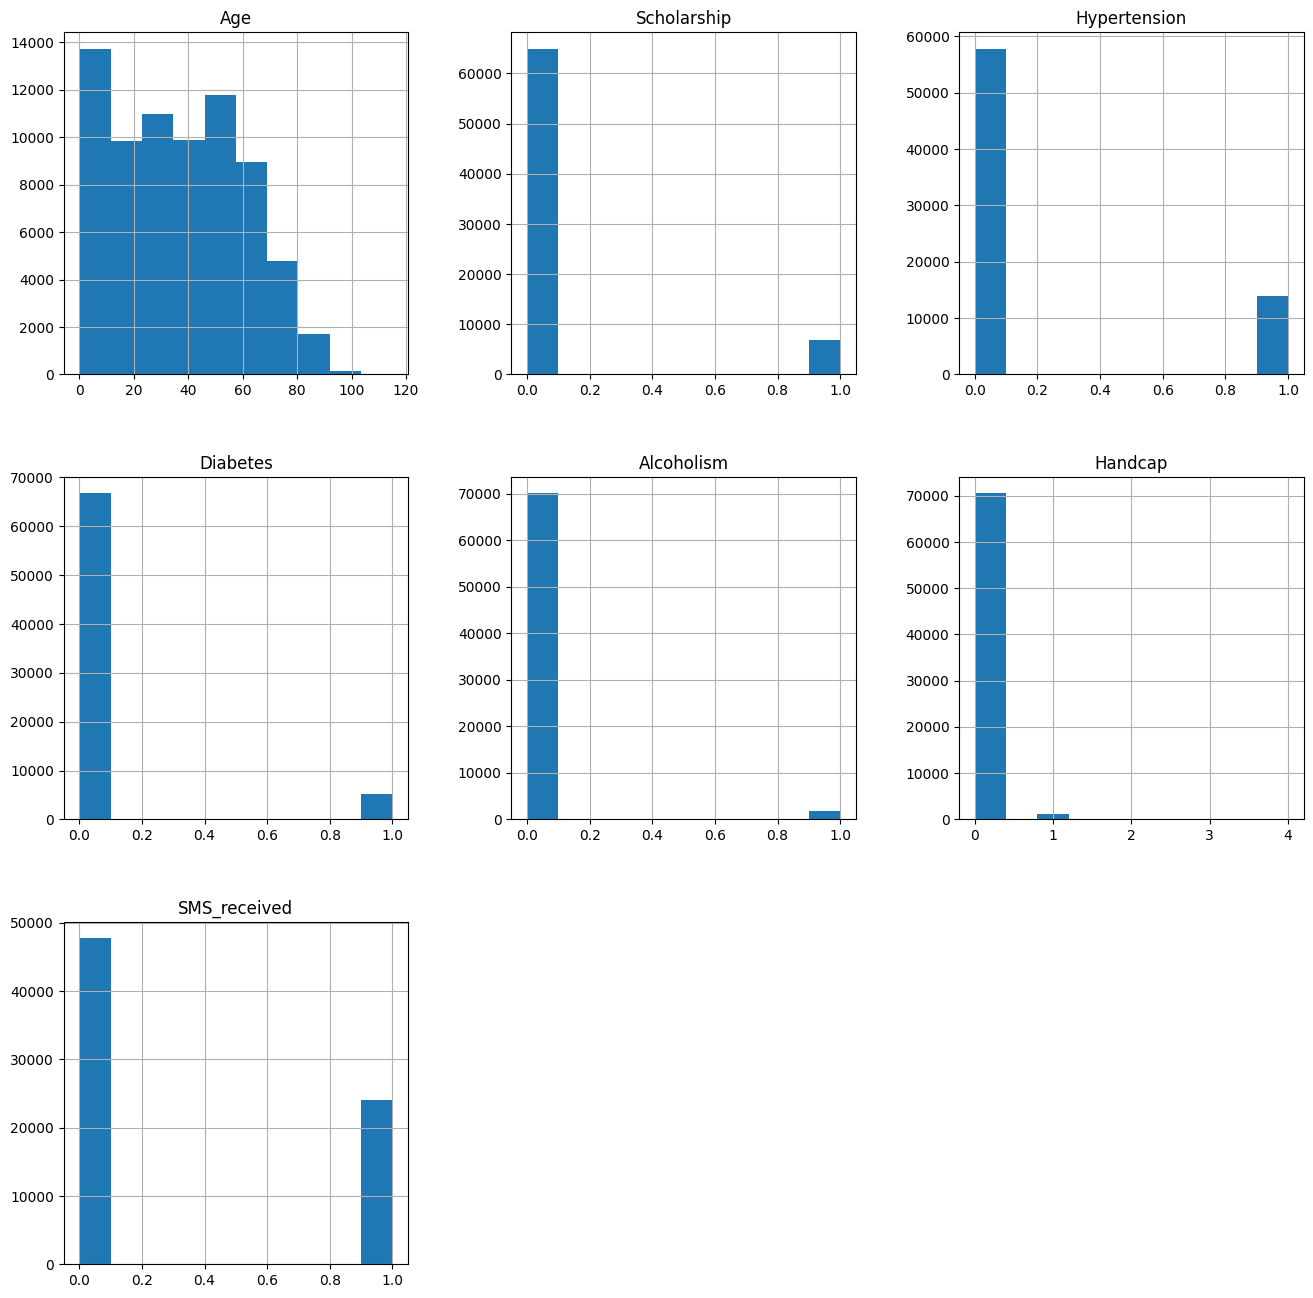

In [61]:
df.hist(figsize=(16,16));

In [69]:
show = (df.No_show == 'No')
Noshow = (df.No_show == 'Yes')
df[show].count() , df[Noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

# check the attendence

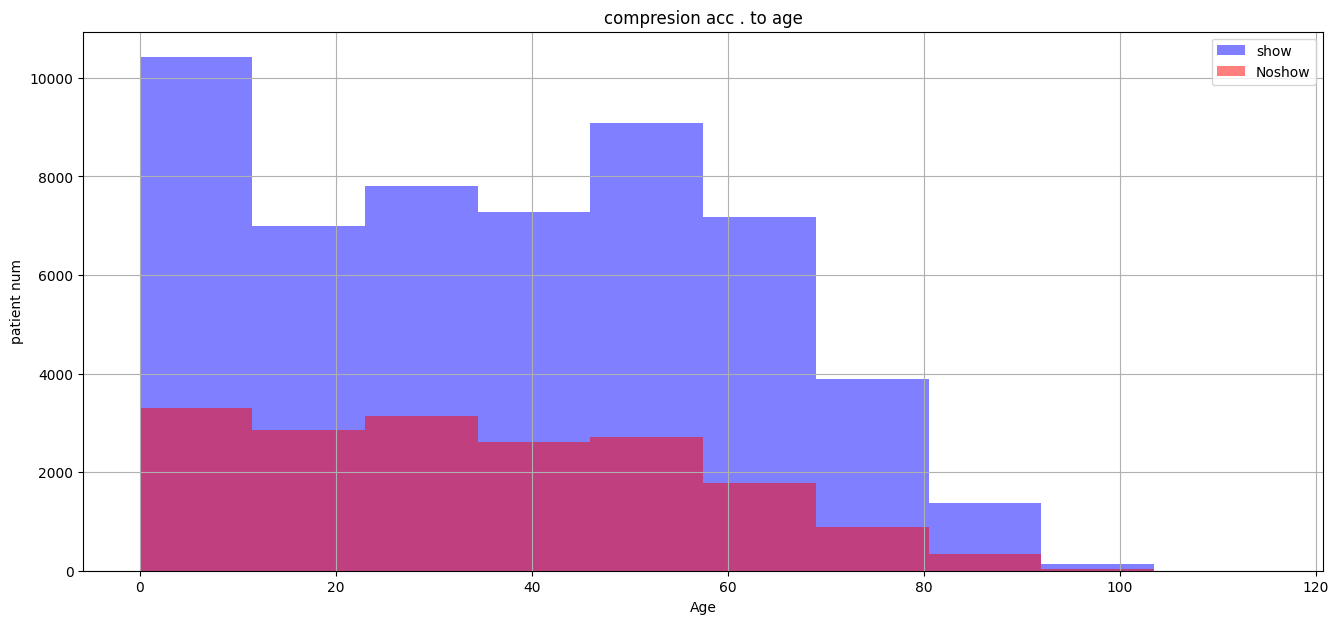

In [75]:
def  attendence( df  ,  colname , attended  ,  absent):
    mplt.figure(figsize=(16,7))
    df [colname][show].hist( alpha = 0.5 , bins = 10 , color = 'blue' , label = 'show')
    df [colname][Noshow].hist( alpha = 0.5 , bins = 10 , color = 'red' , label = 'Noshow')
    mplt.legend()
    mplt.title('compresion acc . to age')
    mplt.xlabel('Age')
    mplt.ylabel('patient num')
    mplt.show()

attendence(df , 'Age' , show , Noshow)
    

In [76]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

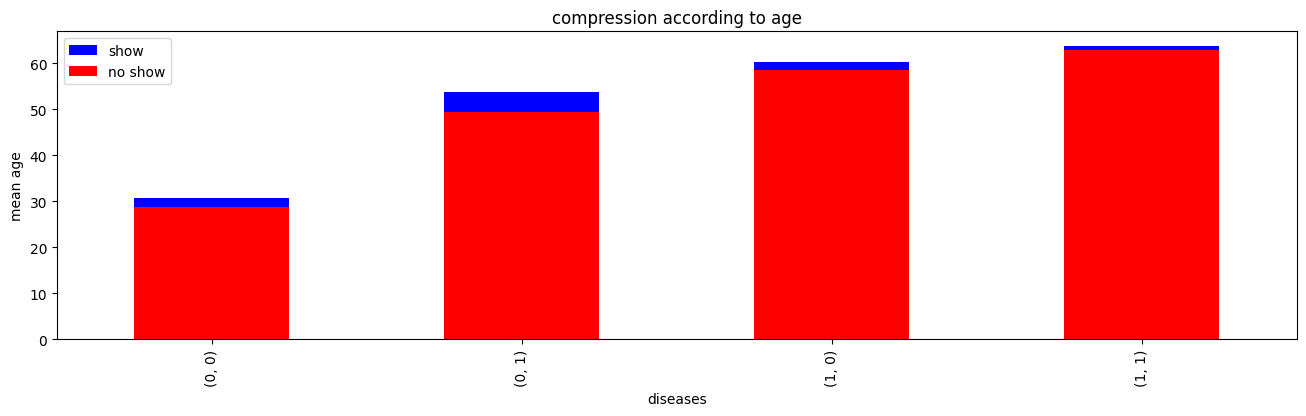

In [95]:
# does the diseases and age affect the attendence together 
mplt.figure(figsize=(16,4))
df[show].groupby(['Hypertension' , 'Diabetes'])['Age'].mean() .plot(kind = 'bar' , color = 'blue' , label = 'show')
df[Noshow].groupby(['Hypertension' , 'Diabetes'])['Age'].mean() .plot(kind = 'bar' , color = 'r' , label = 'no show')
mplt.legend()
mplt.title('compression according to age')
mplt.xlabel('diseases')
mplt.ylabel('mean age')
mplt.show()

In [96]:
df[show].groupby(['Hypertension' , 'Diabetes'])['Age'].mean()  , df[Noshow].groupby(['Hypertension' , 'Diabetes'])['Age'].mean() 

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

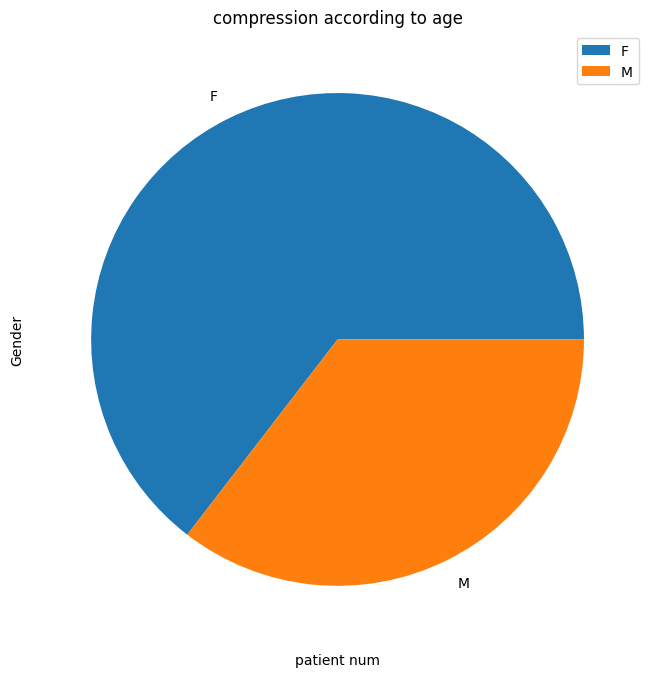

In [105]:
mplt.figure(figsize=(16,8))
df['Gender'][show].value_counts(normalize=True). plot(kind = 'pie' ,label = 'show')
mplt.legend()
mplt.title('compression according to age')
mplt.xlabel('patient num')
mplt.ylabel('Gender')
mplt.show()

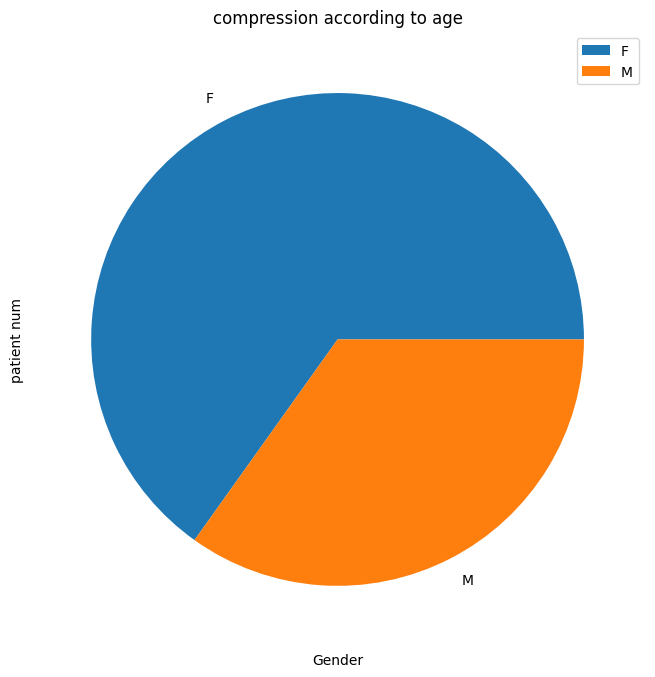

In [106]:
mplt.figure(figsize=(16,8))
df['Gender'][Noshow].value_counts(normalize=True). plot(kind = 'pie' ,label = 'show')
mplt.legend()
mplt.title('compression according to age')
mplt.xlabel('Gender')
mplt.ylabel('patient num')
mplt.show()

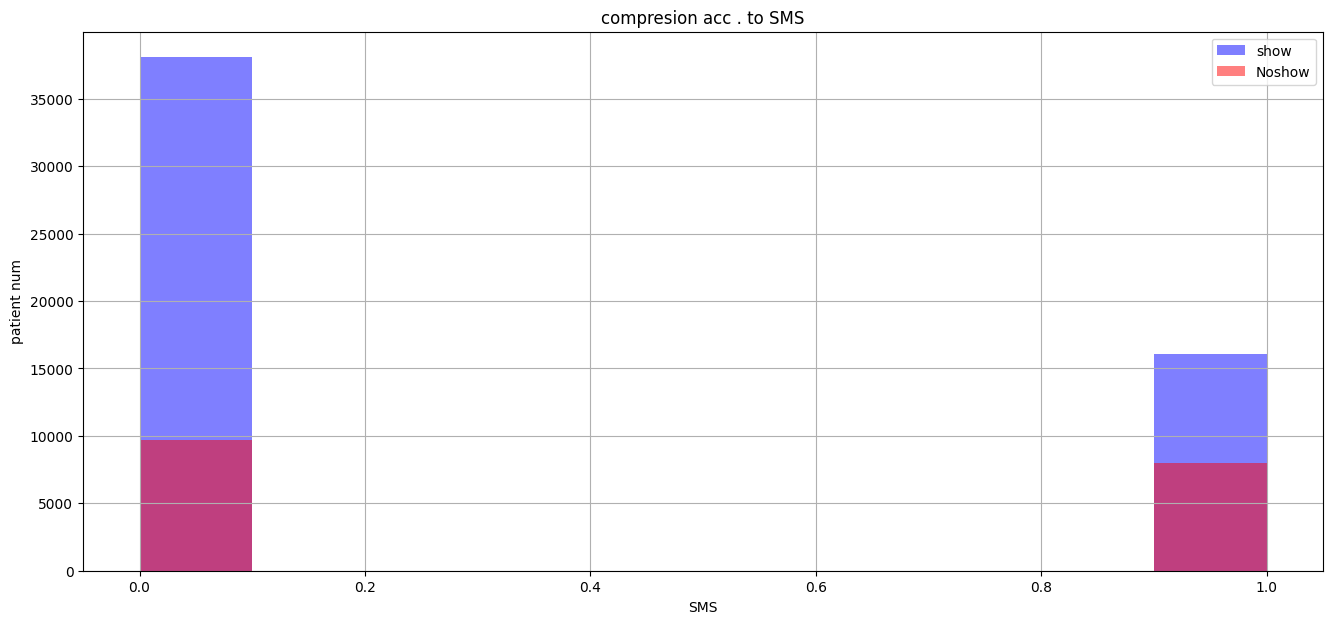

In [109]:
def  attendence( df  ,  colname , attended  ,  absent):
    mplt.figure(figsize=(16,7))
    df [colname][show].hist( alpha = 0.5 , bins = 10 , color = 'blue' , label = 'show')
    df [colname][Noshow].hist( alpha = 0.5 , bins = 10 , color = 'red' , label = 'Noshow')
    mplt.legend()
    mplt.title('compresion acc . to SMS')
    mplt.xlabel('SMS')
    mplt.ylabel('patient num')
    mplt.show()

attendence(df , 'SMS_received' , show , Noshow)